### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


# Assignment 3: Classification with Logistic Regression [ __ /100 marks]

In this assignment we will use the `diabetes` dataset, which was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database.

We will use logistic regression to predict whether subjects have diabetes or not.


## Global Toolbox


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
seed=0


## Question 1.1 [ _ /3 marks]

Read the file `diabetes.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame.


In [2]:
# ****** your code here ******
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question 1.2 [ _ /6 marks]

(1) How many classes are there? How many features are available to predict the outcome?


**Your answer**:
There are 2 classes. Whether subjects have diabetes or they do not have diabetes. There are 8 features available to predict this outcome.


(2) Is the dataset class-balanced?


In [3]:
# ****** your code here ******
df.Outcome.value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

**Your answer**:
The dataset is not class balanced because the count of subjects with diabetes is 268 while the count of subjects without diabetes is 500.


(3) For this classification problem, what is the baseline accuracy and how would you interpret it? Round into 3 decimal place.


In [4]:
# ****** your code here ******
counts=df.Outcome.value_counts()
baseline_accuracy = round(counts[0]/(counts[0]+counts[1]), 3)
print("Baseline Accuracy is:", baseline_accuracy)

# a ml model should be able to predict better than the baseline accuracy of 65.1% or it is not useful


Baseline Accuracy is: 0.651


## Question 1.3 [ _ /3 marks]

Use `train_test_split` with `random_state=0` to split the data into training and test sets. Leave `20%` for testing.


In [5]:
# Store all the features into variable "X"
X = df.drop('Outcome', axis='columns').values

# Store the output class values into variable "y" 
y = df.Outcome.values

# Split your X and y data using train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)


## Question 2.1 [ _ /3 marks]

We will use sklearn's `LogisticRegression` to solve the classification problem. Before we move on, answer the following questions by reading the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


(1) Does `LogisticRegression` use a penalty by default? If yes, what penalty?

**Your answer**: The default penalty is L2 regularization.

(2) If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients (parameters), relative to not applying a penalty during learning?

**Your answer**: The coefficients are going to be smaller when a penalty is applied and larger when it is not.

(3) If using the default settings of `LogisticRegression`, do you need to include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**Your answer**: A column of 1s is not needed because sklearn estimates the intercept by default.


## Question 2.2 [ _ /10 marks]

Create a `LogisticRegression` model with `penalty=none`. Let's fisrt train and test this classifier using only "Insulin" as the input feature. Make a scatter plot of the points. Plot your prediction on the same graph.


/Users/parm/anaconda3/envs/DSenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/parm/anaconda3/envs/DSenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/parm/anaconda3/envs/DSenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


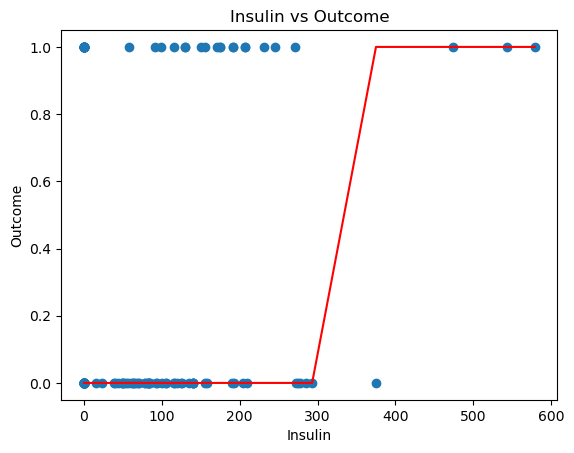

In [6]:
# Create a LogisticRegression model without regularization 
logreg = LogisticRegression(penalty='none', max_iter=10000)

# Obtain training data and test data for insulin
xtrain = Xtrain[:, 4].reshape(-1, 1)
xtest = Xtest[:, 4].reshape(-1, 1)

# Fit the model using the training data
logreg.fit(xtrain, ytrain)

# Create a scatter plot of the test data. 
plt.scatter(xtest, ytest)
plt.xlabel('Insulin')
plt.ylabel('Outcome')
plt.title('Insulin vs Outcome')

# predict the outcome using the test data
ypred = logreg.predict(xtest)

# Also plot your prediction using sns.lineplot
# lineplot needs 1d vector x
sns.lineplot(x=xtest.reshape(-1), y=ypred, color = 'red')
plt.show()


## Question 2.3 [ _ /10 marks]

Evaluate the classification performance using `Accuracy`, `Recall`, `Precision`, `Sensitivity` and `Specificity`.


In [7]:

def computePerformanceMetrics(yhat, y, classes):
   
    # True positive, true negative, false positive, false negative 
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f'True Positives: {tp}')
    print(f'True Negatives: {tn}')
    print(f'False Positives: {fp}')
    print(f'False Negatives: {fn}')
    
    # Accuracy - the proportion of the total number of predictions that were correct
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print("Accuracy:", round(accuracy,3))
    
    # recall
    recall = tp / (tp + fn)
    print("Recall:", round(recall,3))
    
    # precision
    precision = tp / (tp + fp)
    print("Precision:", round(precision,3))
    
    # sensitivity
    sensitivity = recall
    print("Sensitivity:", round(sensitivity,3))
    
    # specificity
    specificity = tn / (tn + fp)
    print("Specificity:", round(specificity,3))


# call the function
computePerformanceMetrics(ypred, ytest, logreg.classes_)


True Positives: 3
True Negatives: 106
False Positives: 1
False Negatives: 44
Accuracy: 0.708
Recall: 0.064
Precision: 0.75
Sensitivity: 0.064
Specificity: 0.991


## Question 3.1 [ _ /10 marks]

Create another `LogisticRegression` model with `penalty=none`. Train and test this classifier with all features and then evaluate the performance.


In [8]:
# Create a LogisticRegression model without regularization 
logreg2 = LogisticRegression(penalty='none', max_iter=10000)

# Fit to your training data using Logistic Regression 
logreg2.fit(Xtrain, ytrain)


# Compute your test predictions, given test inputs 
ypred2 = logreg2.predict(Xtest)


# Evaluate the performance
computePerformanceMetrics(ypred2, ytest, logreg2.classes_)


True Positives: 29
True Negatives: 98
False Positives: 9
False Negatives: 18
Accuracy: 0.825
Recall: 0.617
Precision: 0.763
Sensitivity: 0.617
Specificity: 0.916


/Users/parm/anaconda3/envs/DSenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Does using more features help to improve the classification?

**Your answer** : yes using more features helps improve classification because high insulin levels itself is likely to predict diabetes but low insulin seems like a random guess to predict diabetes as seen in the chart for logreg model 1.


## Question 3.2 [ _ /10 marks]

Let's adjust the decision threshold from 0.5 (default) to 0.4 and 0.6, and then evlaute the performance.


In [9]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
threshold = 0.4
ytest_prob = logreg2.predict_proba(Xtest)
ypred2new = logreg2.classes_[(ytest_prob[:,1] > threshold).astype(int)]

# Evaluate the performance
computePerformanceMetrics(ypred2new, ytest, logreg2.classes_)


True Positives: 34
True Negatives: 88
False Positives: 19
False Negatives: 13
Accuracy: 0.792
Recall: 0.723
Precision: 0.642
Sensitivity: 0.723
Specificity: 0.822


In [10]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
threshold = 0.6
ytest_prob = logreg2.predict_proba(Xtest)
ypred2new = logreg2.classes_[(ytest_prob[:,1] > threshold).astype(int)]


# Evaluate the performance
computePerformanceMetrics(ypred2new, ytest, logreg2.classes_)


True Positives: 26
True Negatives: 100
False Positives: 7
False Negatives: 21
Accuracy: 0.818
Recall: 0.553
Precision: 0.788
Sensitivity: 0.553
Specificity: 0.935


What do you think is a better threshold?

**Your answer**: based on the requirements and constraints of the project at hand. Need to discuss these with stakeholders. maybe we want to have the model with the highest accuracy but this depends on if thats important to the project.


## Question 3.3 [ _ /10 marks]

Create a final `LogisticRegression` model with `penalty=l2`, `C=0.01`. Train and test this classifier with all features and then evaluate the performance.


In [11]:
# Create a LogisticRegression model with l2 regularization 
logreg3 = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='ovr', C=0.01, max_iter=10000)

# Fit to your training data using Logistic Regression 
logreg3.fit(Xtrain, ytrain)

# Compute your test predictions, given test inputs 
ypred3 = logreg3.predict(Xtest)

# Evaluate the performance
computePerformanceMetrics(ypred3, ytest, logreg3.classes_)


True Positives: 28
True Negatives: 97
False Positives: 10
False Negatives: 19
Accuracy: 0.812
Recall: 0.596
Precision: 0.737
Sensitivity: 0.596
Specificity: 0.907


Does regularization help to improve the classification?

**Your answer** : no the classification is not improved thru regularization with l2.


## Question 4 [ _ /15 marks]

Plot ROC Curves for the classifiers you used in questions 2.2, 3.1, and 3.3. Use AUC to determine which classifier is the best.


/Users/parm/anaconda3/envs/DSenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/parm/anaconda3/envs/DSenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/parm/anaconda3/envs/DSenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/parm/anaconda3/envs/DSenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

AUC for Q2.2: 0.536
AUC for Q3.1: 0.867
AUC for Q3.3: 0.853


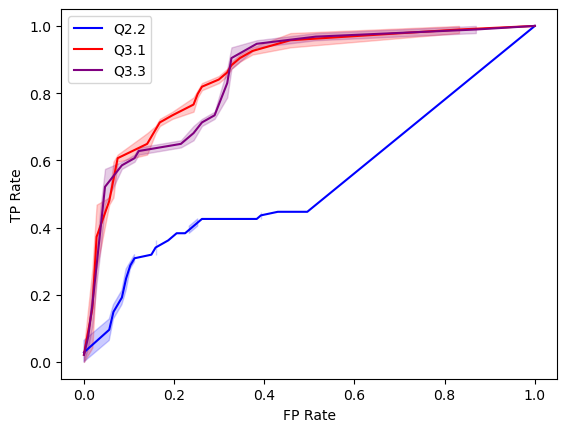

In [12]:

# Use roc_curve to get FPR and TPR for each of the 3 classifiers
fpr1, tpr1, _ = roc_curve(ytest, logreg.predict_proba(xtest)[:,1], pos_label=1)
fpr2, tpr2, _ = roc_curve(ytest, logreg2.predict_proba(Xtest)[:,1], pos_label=1)
fpr3, tpr3, _ = roc_curve(ytest, logreg3.predict_proba(Xtest)[:,1], pos_label=1)

# Plot all of the ROC curves 
ax = sns.lineplot(x=fpr1, y=tpr1, color="blue",  label='Q2.2')
ax = sns.lineplot(x=fpr2, y=tpr2, color="red",   label='Q3.1')
ax = sns.lineplot(x=fpr3, y=tpr3, color="purple", label='Q3.3')
ax.set_xlabel("FP Rate")
ax.set_ylabel("TP Rate")


# Determine AUC for each of the ROC curves 
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)

print("AUC for Q2.2:", round(auc1,3))
print("AUC for Q3.1:", round(auc2,3))
print("AUC for Q3.3:", round(auc3,3))


Which one is the best classifier?

**Your answer** The model from Q 3.1 (logreg2) which uses all features and no regularization seems like the best model because its AUC is the highest meaning for all tolerated false positive rates (thresholds) it maximizes the true positives and minimizes false positives overall compared to the other models.


## Question 5 [ _ /10 marks]

Multiclass Logistic Regression

In the classification lab, we trained a binary LR classifier using the _mnist_ dataset to discriminate entries which were equal to 5 from the rest. Use the same dataset to train a multiclass **Logistic Regression** using the [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) with `l2` regularization. So, this time you will have 10 classes, _i.e._, 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. For training use `max_iter=2000`, `tol=1e-3`, `random_state=seed`. For some `sklearn` functions you can set argument `n_jobs=N` to run them in parallel and speed up computations. A good value for N can be the number of physical CPU cores that your machine possesses (`N=-1` would use all cores). Check the documentations of the functions to take advantage from this where possible.

First load the data and plot a histogram to comment on class distribution qualitatively. For splitting the data into train and test sets, use `test_size=0.5` and `random_state=seed`. What is the balanced accuracy score of your model?


In [13]:
### your stuff
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

x_mnist = mnist['data']
y_mnist = mnist['target'].astype(np.uint8)


Classes: [0 1 2 3 4 5 6 7 8 9]
Class count: [6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]


/Users/parm/anaconda3/envs/DSenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


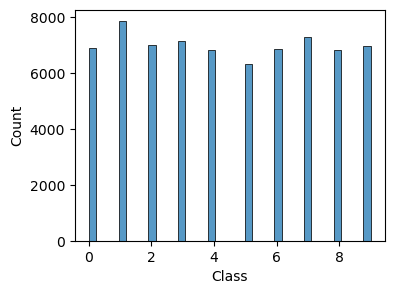

In [14]:
c, n = np.unique(y_mnist, return_counts=True)
print('Classes:', c)
print('Class count:',n)

fig, ax = plt.subplots(figsize=(4, 3))
sns.histplot(y_mnist).plot(ax=ax)
plt.xlabel('Class')
plt.show()


**Your written answer**:
according to the histogram it looks like we have balanced class distribution in general


In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x_mnist, y_mnist, test_size=0.5, random_state=seed)

clf1 = SGDClassifier(loss='log_loss', penalty="l2", max_iter=2000, tol=1e-3, n_jobs=-1, random_state=seed).fit(X_train, y_train)

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, clf1.predict(X_test)).round(2)


0.85

## Question 6 [ _ /10 marks]

Run the cell below to see how well your model can recognize a digit drawn by the mouse cursor. Set the variable `final_model`, run the cell, draw on the pop-up canvas, and once you close the canvas you will see the model's recognition of your input.

Despite the cell using your classifier, which has a high balanced accuracy score, it often makes mistakes and its performance seems questionable. Try to explain in words why is that so?

Caveat: The cell below will not run on headless servers, you will need to use a local installation of python. You might have some fun until you can get it to work, but that's ok, because I want you to try your hands on technicalities and not always rely on online services.



Input recognized as 8.


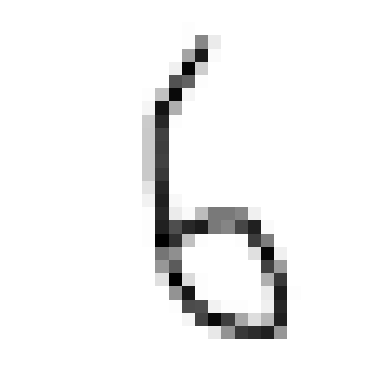

In [16]:
final_model = clf1
#!pip install tk-tools
from tkinter import *
import tkinter as tk
from PIL import Image
import io
import matplotlib as mpl

temp_file_name="TEMP_image_TEMP.jpg"
app = Tk()
app.geometry("300x300")
canvas = tk.Canvas(app, bg='white')
canvas.pack(anchor='nw', fill='both', expand=1)
def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw_smth(event):
    global lasx, lasy
    canvas.create_line((lasx, lasy, event.x, event.y), fill='red', width=4)
    lasx, lasy = event.x, event.y
    ps = canvas.postscript(colormode = 'color')
    img = Image.open(io.BytesIO(ps.encode('utf-8')))
    img.save(temp_file_name)

canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw_smth)

app.mainloop()
img = Image.open(temp_file_name)
#resize image to 28x28 pixels
img = img.resize((28,28))
#convert rgb to grayscale
img = img.convert("L")
img = np.array(img)
img = 255.0 - img
plt.imshow(img, cmap = mpl.cm.binary); plt.axis("off")
# reshaping to support our model input
img = np.reshape(img, 28*28)

#predicting the class
print('\nInput recognized as ' + str(final_model.predict([img])[0])+'.')


**Your answer**:

this model is very poor at predicting numbers drawn. it might be because the mouse drawings of numbers are very pixelated while the numbers of the dataset are cleanly represented so our model is trained on clean numbers while we are generalizing it to mouse drawn numbers. The metrics in this case do not tell the entire story.
